### ME 35 Image Processing Introduction
The goal of this notebook is to get you able to do simple image processing.  Dipesh has built up a large number of help activities.  If you are new to Jupyter Notebooks, go [here](/sd) to see a notebook on how to use notebooks.

### 1: Read an image
The first step will be to figure out how to read an image from a file. To do this we will use [openCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html). To do this from within a Jupyter Notebook requires a few extra python libraries and a little function.  You will need to convert the array to an image and then show it.
- [PIL.Image](https://pillow.readthedocs.io/en/stable/reference/Image.html) - Python Image Library
- [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) - display in the notebook
- imutils and io - for converting things
- [cv2 image read](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html?highlight=imread) - returns an array of BGR
- [cv2 convert color](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html?highlight=cvtcolor) - converts from BGR to RGB
- [cv2 resize](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html?highlight=resize) - resizes the image

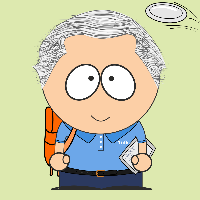

In [1]:
import cv2
import PIL.Image
from io import BytesIO
import IPython.display
import imutils

def array_to_image(a, fmt='png'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)    
    return IPython.display.Image(data=f.getvalue())

d1 = IPython.display.display("Your image will be displayed here", 
                             display_id=1)
array = cv2.imread("/home/pi/Desktop/me35Notebook/images/chrisNew.png")
array = cv2.cvtColor(array, cv2.COLOR_BGR2RGB)
array = imutils.resize(array, width=200, inter=cv2.INTER_LINEAR)
image = array_to_image(array)
d1.update(image)

### 2: Mess with the image
Try changing the size of the image to have a width of 400 pixels or a height of 150 pixels.  Try loading up a picture of Ethan instead (same path, only ethan.png).  Note that in the future - you can always update d1 (that space in the notebook) from anywhere else in the notebook.

### 3: Grab an image
Now you should use OpenCV to grab an image and display it up in the space d1 where you should now have a picture of Ethan.  You will need to use
[cv2 Videocapture class](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html?highlight=videocapture) to grab an image.  Note that their example uses cv2.imshow - which will not work here in the notebook so you might want to adapt it using your code above.  If you run into difficulty, [Dipesh]() has some hints.

In [4]:
import numpy as np

cap = cv2.VideoCapture(0)

ret, frame = cap.read()
array = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()
array = imutils.resize(array, width=200, inter=cv2.INTER_LINEAR)
image = array_to_image(array)
d1.update(image)

### 4: Messing with the camera
Try viewing the image in color.  Or maybe just the red plane (all sorts of useful things are [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html?highlight=red%20plane)).  Or even better, take the red plane and subtract the green and blue planes from it - what do you have left?

In [5]:
b,g,r = cv2.split(array)
image = array_to_image(r)
d1.update(image)

### 5: Viewing the histogram
It is often useful to see the distribution of red, green, and blue pixels.  For this, OpenCV very nicely has the [calcHist()](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html#histograms-getting-started) property.  Try editing their example so that it uses the image of ethan or the image from your camera.  Note the use of matplotlib - a rather useful Python package.

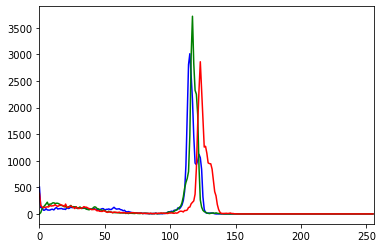

In [6]:
from matplotlib import pyplot as plt

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([array],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### 6: Binary Images
To make life even easier (and faster), we will often take a greyscale image and [threshold](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html?highlight=threshold) it so that all pixels below a given value will be 0 and all above will be 1.  From your histogram, choose a value that will split your image, and use that as a threshold and see how the resulting image turns out.

In [11]:
ret,thresh1 = cv2.threshold(array,127,255,cv2.THRESH_BINARY)
image = array_to_image(thresh1)
d1.update(image)

### 7: Binary Morphology
So now that you have an image, it is time to start identifying things in it.  The easiest way is with binary [morphology](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html?highlight=binary%20morphology).  Once you have a binary image, you need to clean it up, getting rid of small imperfections.  Try applying some of these functions to your image:
- erosion
- dilation
- opening
- closing
- subtracting the eroded image from the dilated one
- or any other kernel that looks like fun


In [13]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
image = array_to_image(erosion)
d1.update(image)

### 8: Wrap-up
You should be able to write Python code now (on your laptop or the rPi) that leverages openCV to grab an image from the camera and allows you to look at the color planes and histogram.  Check out some of Dipesh's examples that do:
- video
- facial identification
- please add them all - all hyperlinked